In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

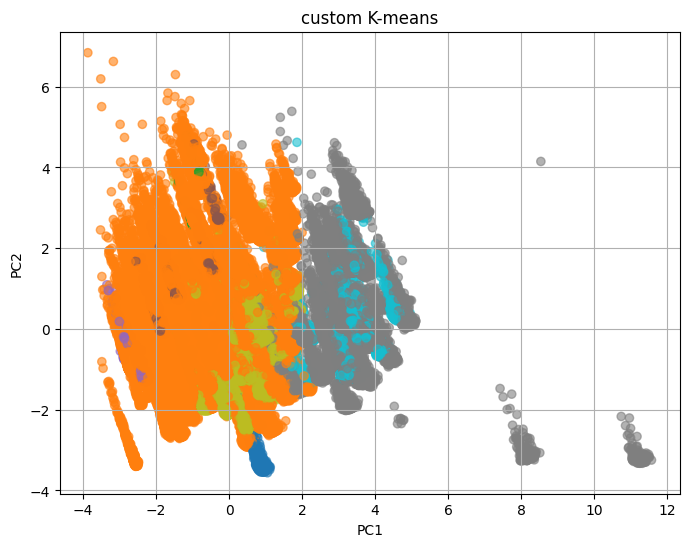

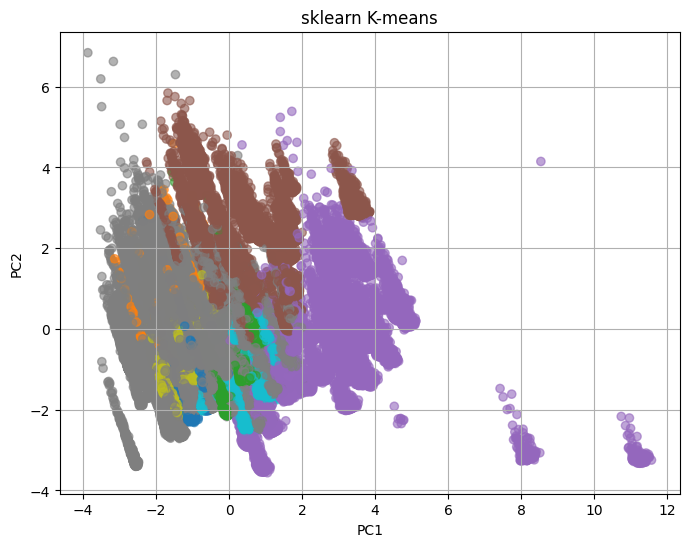

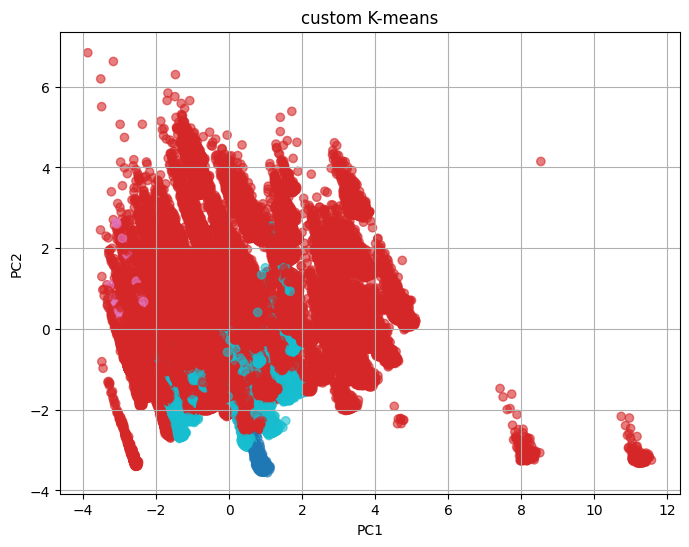

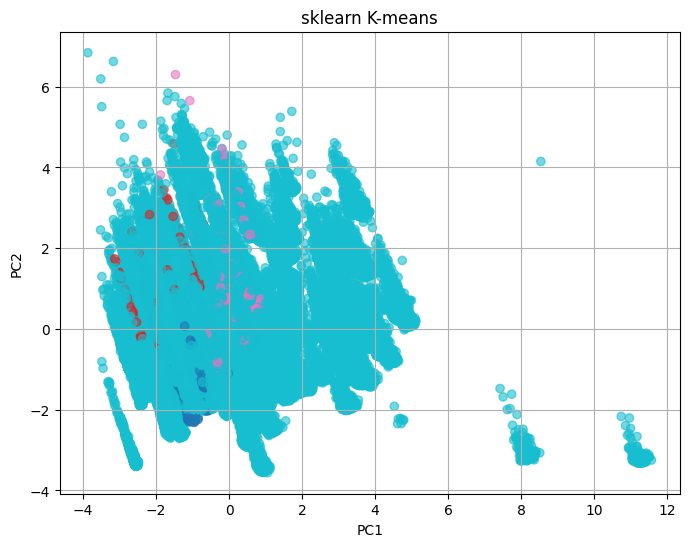

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


df = pd.read_csv("flights.csv")

df = df[['dep_delay', 'arr_delay', 'air_time', 'distance', 'carrier', 'origin', 'dest']]
df = df.dropna()

df_encoded = pd.get_dummies(df, columns=['carrier', 'origin', 'dest'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

#custom kmeans
def custom_kmeans(X, k, n_iters):
    rng = np.random.default_rng(10101)
    centroids = X[rng.choice(X.shape[0], size=k, replace=False)]

    for _ in range(n_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroids[i] for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels

k = 8
preds = custom_kmeans(X_scaled, k, 100)

# using PCA to viz the data in 2d dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds, cmap='tab10', alpha=0.6)
plt.title("custom K-means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


##compare to sklearmn #######

sk_labels = KMeans(n_clusters=k, random_state=10101).fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sk_labels, cmap='tab10', alpha=0.6)
plt.title("sklearn K-means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()




k = 4
preds = custom_kmeans(X_scaled, k, 1000)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds, cmap='tab10', alpha=0.6)
plt.title("custom K-means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


from sklearn.cluster import KMeans

sk_labels = KMeans(n_clusters=k, random_state=10101).fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sk_labels, cmap='tab10', alpha=0.6)
plt.title("sklearn K-means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


### this dataset doesn't seem to be good for clustering difficult to find any
### insights:(
